In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# For optimization using pygmo
import pygmo as pg
import numpy as np
from udp_initial_condition import udp_initial_condition

# For Plotting
import matplotlib.pyplot as plt

In [21]:
# Setup hyperparameters:
body_density = 533                  # https://sci.esa.int/web/rosetta/-/14615-comet-67p
target_altitude = 5000**2           # Target altitude squared
final_time = 20*3600.0              # Final time
start_time = 0                      # Starting time
time_step = 800              # Time step size for trajectory propagation.

# Bounds for initial variable domain: [r_x,r_y,r_z,v_x,v_y,v_z]
lower_bounds, upper_bounds = np.array([-6000,-6000,-6000,0,0,0]),np.array([6000,6000,6000,2.5,2.5,2.5])

# Optimization parameters
population_size = 10 #10
number_of_generations = 32 #32

In [22]:
# Choose algorithm: 
#  - "RKF78", "Euler" or "DP8713M"
algorithm = "RKF78"

# Setup problem class
udp = udp_initial_condition(body_density, target_altitude, final_time, start_time, time_step, lower_bounds, upper_bounds, algorithm)

# Setup user defined problem (udp)
prob = pg.problem(udp)

# Setup optimization algorithm
algo = pg.algorithm(pg.sade(gen = number_of_generations))
pop = pg.population(prob = prob, size = population_size)

# Run optimization
algo.set_verbosity(1)
pop = algo.evolve(pop)

# Logs for output
print("Champion fitness value: ", pop.champion_f) 
print("Champion chromosome: ", pop.champion_x) 

# Retrieving champion chromosome
x = pop.champion_x

# Compute optimized trajectory
fitness_value, trajectory_info = udp.compute_trajectory(x)

# Plot optimized trajectory
udp.plot_trajectory(trajectory_info[0:3,:])

plt.plot(trajectory_info[0,:],trajectory_info[1,:])

Physical dimension along x (UN-normalized):  5002.5703125 Km


Physical dimension along x (UN-normalized):  5002.5703125 Km

   Gen:        Fevals:          Best:             F:            CR:            dx:            df:
      1             10    3.74731e+08       0.540077       0.511594        11121.9    1.99007e+10
      2             20    3.74731e+08       0.540077       0.511594        11121.9    1.99007e+10
      3             30    3.74731e+08       0.540077       0.511594          11122    1.86011e+10
      4             40    3.74731e+08       0.540077       0.511594        9973.24    1.85202e+10
      5             50    9.14013e+06       0.496556       0.176473        4580.86    1.73925e+10
      6             60    9.14013e+06       0.496556       0.176473        4580.86    1.73925e+10
      7             70    9.14013e+06       0.496556       0.176473        4711.14    1.73658e+10
      8             80    9.14013e+06       0.496556       0.176473        4710.11    1.34709e+10
      9             90    9.14013e+06       0.496556    

BokehModel(combine_events=True, render_bundle={'docs_json': {'74da81f8-8da0-46a1-a6df-b3668a14d58e': {'defs': …

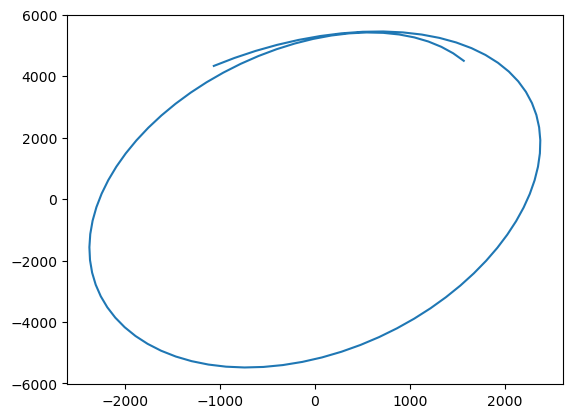

In [24]:
##################################################################
#                 For evaulation using cProfile.                 #
##################################################################

import cProfile
import pstats

def run():

    # Setup hyperparameters:
    body_density = 533                  # https://sci.esa.int/web/rosetta/-/14615-comet-67p
    target_altitude = 5000**2           # Target altitude squared
    final_time = 20*3600.0              # Final time
    start_time = 0                      # Starting time
    time_step = 800              # Time step size for trajectory propagation.

    # Bounds for initial variable domain: [r_x,r_y,r_z,v_x,v_y,v_z]
    lower_bounds, upper_bounds = np.array([-6000,-6000,-6000,0,0,0]),np.array([6000,6000,6000,2.5,2.5,2.5])

    # Optimization parameters
    population_size = 10
    number_of_generations = 32

    # Choose algorithm: 
    #  - "RKF78", "Euler" or "DP8713M"
    algorithm = "RKF78"

    # Setup problem class
    udp = udp_initial_condition(body_density, target_altitude, final_time, start_time, time_step, lower_bounds, upper_bounds, algorithm)

    # Setup user defined problem (udp)
    prob = pg.problem(udp)

    # Setup optimization algorithm
    algo = pg.algorithm(pg.sade(gen = number_of_generations))
    pop = pg.population(prob = prob, size = population_size)
    
    # Run optimization
    algo.set_verbosity(1)
    pop = algo.evolve(pop)

    # Logs for output
    print("Champion fitness value: ", pop.champion_f) 
    print("Champion chromosome: ", pop.champion_x) 

    # Retrieving champion chromosome
    x = pop.champion_x

    # Compute optimized trajectory
    fitness_value, trajectory_info  = udp.compute_trajectory(x)

    # Plot optimized trajectory
    udp.plot_trajectory(trajectory_info[0:3,:])

    plt.plot(trajectory_info[0,:],trajectory_info[1,:])

    return trajectory_info


def main():
    trajectory_info = run()


if __name__ == "__main__":
    cProfile.run("main()", "output.dat")

    with open("output_time.txt", "w") as f:
        p = pstats.Stats("output.dat", stream=f)
        p.sort_stats("time").print_stats()
    
    with open("output_calls.txt", "w") as f:
        p = pstats.Stats("output.dat", stream=f)
        p.sort_stats("calls").print_stats()
